Import Libraries

In [29]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import pickle

Load Dataset

In [2]:
df = pd.read_csv('heart_disease_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float64(1), int64(13)
m

Basic EDA

In [30]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    float64
 4   cholesterol              400 non-null    float64
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    float64
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float64(5), int64(9)
me

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_induced_angina,0
st_depression,0


Correlation Heatmap

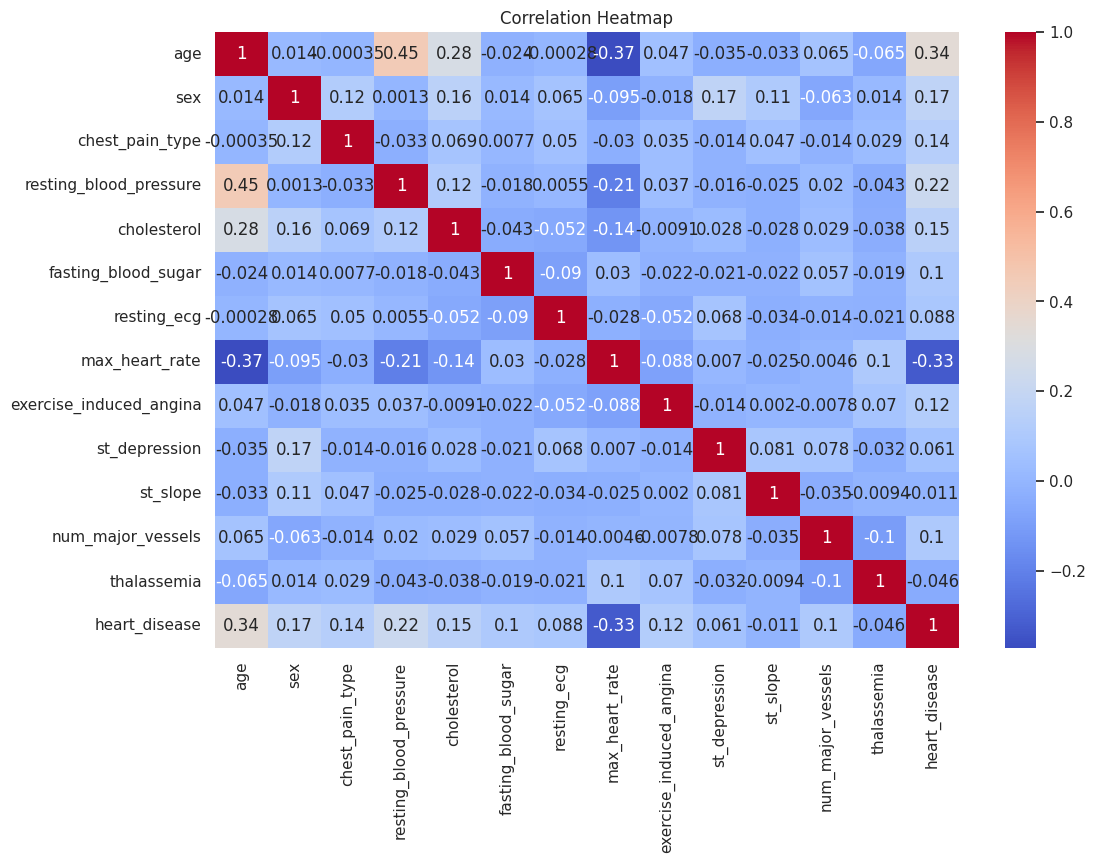

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Train-Test Split

In [32]:
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Feature Scaling

In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Baseline Models

In [34]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall (Sensitivity):", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)

    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP)
    print("Specificity:", specificity)

Decision Tree

In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

evaluate_model(dt, X_test, y_test)

Accuracy: 0.5875
Precision: 0.6122448979591837
Recall (Sensitivity): 0.6818181818181818
F1 Score: 0.6451612903225806
ROC-AUC: 0.577020202020202

Confusion Matrix:
 [[17 19]
 [14 30]]
Specificity: 0.4722222222222222


Random Forest

In [36]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

evaluate_model(rf, X_test, y_test)

Accuracy: 0.6625
Precision: 0.673469387755102
Recall (Sensitivity): 0.75
F1 Score: 0.7096774193548387
ROC-AUC: 0.7642045454545454

Confusion Matrix:
 [[20 16]
 [11 33]]
Specificity: 0.5555555555555556


Logistic Regression

In [37]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)

evaluate_model(lr, X_test_scaled, y_test)

Accuracy: 0.675
Precision: 0.6956521739130435
Recall (Sensitivity): 0.7272727272727273
F1 Score: 0.7111111111111111
ROC-AUC: 0.7342171717171717

Confusion Matrix:
 [[22 14]
 [12 32]]
Specificity: 0.6111111111111112


SVM

In [38]:
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

evaluate_model(svm, X_test_scaled, y_test)

Accuracy: 0.65
Precision: 0.6739130434782609
Recall (Sensitivity): 0.7045454545454546
F1 Score: 0.6888888888888889
ROC-AUC: 0.735479797979798

Confusion Matrix:
 [[21 15]
 [13 31]]
Specificity: 0.5833333333333334


ROC Curve Plot

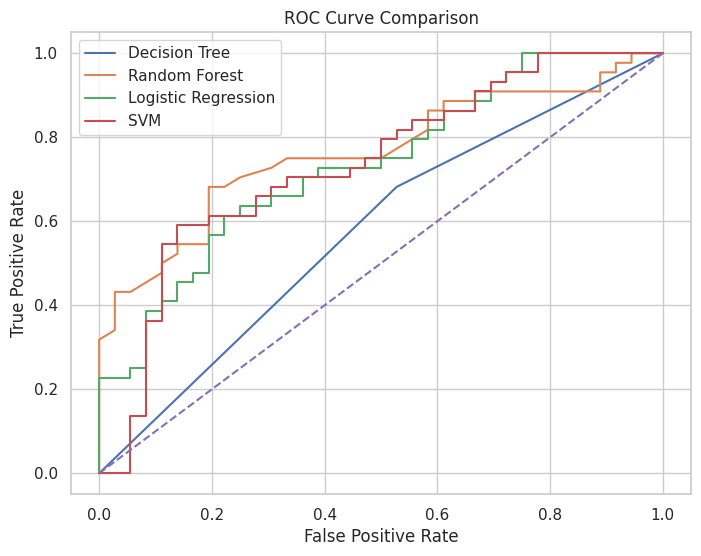

In [39]:
def plot_roc(model, X_test, y_test, name):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.figure(figsize=(8,6))

plot_roc(dt, X_test, y_test, "Decision Tree")
plot_roc(rf, X_test, y_test, "Random Forest")
plot_roc(lr, X_test_scaled, y_test, "Logistic Regression")
plot_roc(svm, X_test_scaled, y_test, "SVM")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

Hyperparameter Tuning (GridSearch)
🔹 Random Forest Tuning

In [40]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

cv = StratifiedKFold(n_splits=5)

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=cv,
    scoring='roc_auc'
)

grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


Evaluate Best Model

In [41]:
best_rf = grid_rf.best_estimator_

evaluate_model(best_rf, X_test, y_test)

Accuracy: 0.6625
Precision: 0.660377358490566
Recall (Sensitivity): 0.7954545454545454
F1 Score: 0.7216494845360825
ROC-AUC: 0.7657828282828283

Confusion Matrix:
 [[18 18]
 [ 9 35]]
Specificity: 0.5


Feature Importance

In [42]:
importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
7,max_heart_rate,0.231768
0,age,0.159031
3,resting_blood_pressure,0.137169
4,cholesterol,0.110897
9,st_depression,0.079330
1,sex,0.070719
2,chest_pain_type,0.055551
11,num_major_vessels,0.045023
12,thalassemia,0.024420
8,exercise_induced_angina,0.023587


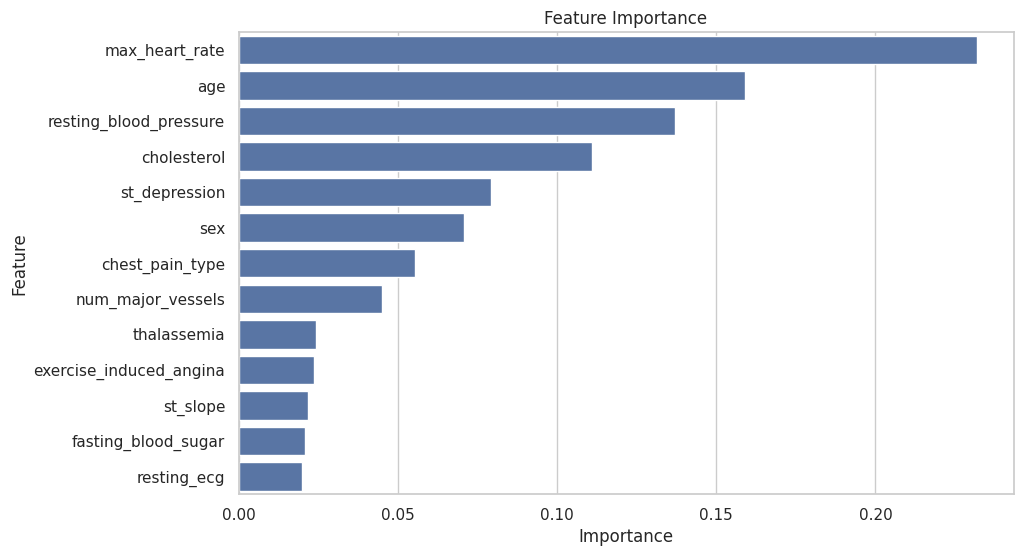

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

In [44]:
with open("heart_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)